In [1]:
import pandas as pd
import numpy as np
pathr='D:/python case study/rounds2.csv'
pathms='D:/python case study/master.csv'


dfr=pd.read_csv(pathr,encoding="cp437")
dfc=pd.read_csv('D:/python case study/companies.csv',encoding="cp437")
#data cleaning for companies.csv

dfc=dfc.drop('homepage_url',axis=1)#we dont need homepage url for any of the data analysis
dfc=dfc.drop('region',axis=1)#we dont need region for any of the data analysis
dfc=dfc.drop('city',axis=1)#we dont need region url for any of the data analysis
dfc=dfc.drop('state_code',axis=1)

dfc=dfc[dfc.isnull().sum(axis=1)<5]#removing rows which have more than 5 missing values

dfc=dfc[~dfc["category_list"].isnull()]# removing rows which have null values for category_list

dfc=dfc[~dfc['name'].isnull()]#removing rows which have null value for names
dfc=dfc[~dfc['country_code'].isnull()]
#


#data cleaned


# data cleaning for round2

dfr=dfr.drop('funding_round_code',axis=1)
dfr=dfr.drop('funding_round_permalink',axis=1)


dfr=dfr[~dfr['raised_amount_usd'].isnull()]


#data cleaned

dfr['company_permalink']=dfr['company_permalink'].str.lower()
dfc['permalink']=dfc['permalink'].str.lower()
print(dfc['permalink'].describe())
print(dfr["company_permalink"].describe())

master1=pd.merge(dfr,dfc.set_index('permalink'),how="inner", left_on='company_permalink',right_on="permalink")

master1=master1[~master1["country_code"].isnull()]
print(master1["company_permalink"].describe())
master1.to_csv(pathms,index=False)






count                      57803
unique                     57803
top       /organization/simparel
freq                           1
Name: permalink, dtype: object
count                        94959
unique                       53917
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object
count                        88516
unique                       48717
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object


In [2]:

dfm=pd.read_csv(pathms)
looop=pd.read_csv(pathms)
print(looop.info())
#print(dfm.info())# to get infomation

dfm=dfm.loc[(dfm["raised_amount_usd"]<= 15000000)&(dfm["raised_amount_usd"]>=5000000)   ,:]#to get the data which has raised amount between 5 to 15 million
k=dfm.groupby("funding_round_type")#grouping the data by funding round type

u=k.sum().sort_values(by=["raised_amount_usd"],ascending=False)
print(u)
#print()
k=k.sum().sort_values(by=["raised_amount_usd"],ascending=False).index#return a list all the sorted total amount invested per round_type

dfm=dfm[dfm["funding_round_type"].isin(k)]#where most companies invest

dfm.to_csv(pathms,index=False)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88516 entries, 0 to 88515
Data columns (total 8 columns):
company_permalink     88516 non-null object
funding_round_type    88516 non-null object
funded_at             88516 non-null object
raised_amount_usd     88516 non-null float64
name                  88516 non-null object
category_list         88516 non-null object
status                88516 non-null object
country_code          88516 non-null object
dtypes: float64(1), object(7)
memory usage: 5.4+ MB
None
                       raised_amount_usd
funding_round_type                      
venture                     1.402267e+11
debt_financing              7.004162e+09
private_equity              3.722570e+09
undisclosed                 1.631440e+09
post_ipo_equity             1.359484e+09
grant                       1.317909e+09
seed                        1.233263e+09
angel                       4.957895e+08
convertible_note            3.818253e+08
post_ipo_debt               2.9

In [3]:
dfm=pd.read_csv("master.csv")
en=["CAN","USA","GBR","IRL","JAM","BRB","TTO","AUS","NZL","IND","PHL","LKA","MYS","NGA","KEN"," GHA","RWA"]#english speaking countries

dfm=dfm.loc[dfm["country_code"].isin(en),:]#geting data of countries which have english as offical language

top9=dfm.groupby("country_code")#grouping the data according to countries
#print(top10.describe(include='all'))
top9=top9["raised_amount_usd"].describe(include="all")

top9=top9.iloc[0:,:].sort_values(by=['count'],ascending=False).index#getting the data of countries which are sorted by total amount invested in the countries

top9=top9[0:9]
print(top9)

dfm=dfm[dfm["country_code"].isin(top9)].sort_values(by="raised_amount_usd",ascending=False)
graph=dfm
dfm=dfm.set_index("company_permalink")
print(dfm.info())

dfm.to_csv(pathms)

Index(['USA', 'GBR', 'CAN', 'IND', 'AUS', 'IRL', 'NZL', 'NGA', 'MYS'], dtype='object', name='country_code')
<class 'pandas.core.frame.DataFrame'>
Index: 15490 entries, /organization/cylance to /organization/st-renatus
Data columns (total 8 columns):
funding_round_permalink    15490 non-null object
funding_round_type         15490 non-null object
funded_at                  15490 non-null object
raised_amount_usd          15490 non-null float64
name                       15490 non-null object
category_list              15490 non-null object
status                     15490 non-null object
country_code               15490 non-null object
dtypes: float64(1), object(7)
memory usage: 1.1+ MB
None


In [ ]:
pathmp='D:/python case study/mapping.csv'
mapp=pd.read_csv(pathmp,encoding="cp437")
dfm=pd.read_csv(pathms)

primary_sector=dfm["category_list"]
li=[]
def Con(string):
                   li.append(string.split("|"))
                   return li[0]

primary_sector=primary_sector.apply(Con)

dfm["primary_sector"]=primary_sector


mapp=mapp.set_index("category_list")


#print(mapp.describe(include="all"))
def getIndexes(dfObj, value):
    #''' Get index positions of value in dataframe i.e. dfObj.'''

    listOfPos = []
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames=[]
    columnNames.append(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows=[]
        rows.append(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append([row, col])
    
    return listOfPos
listOfsec=getIndexes(mapp,1)

ln=[]
lv=[]
for lis in listOfsec:
                   ln.append(lis[0])
                   lv.append(lis[1])

k1=pd.Series(ln)
print(len(ln))
k2=pd.Series(lv)
k=pd.DataFrame({"category_list":k1,
               "main_sector":k2})

k=pd.merge(dfm,k,how="inner",left_on='primary_sector',right_on='category_list')
print(k.info())



k.to_csv(pathms,index=False)


In [4]:
dfm = pd.read_csv('D:\casestudytest\master.csv')
top3 = dfm.groupby("country_code")  # grouping the data according to countries

top3 = top3["raised_amount_usd"].describe(include='all')

top3 = top3.iloc[0:, :].sort_values(by=['count'],
                                    ascending=False).index  # getting the data of countries which are sorted by total amount invested in the countries
top3 = top3[0:3]


d1 = dfm[dfm["country_code"].isin([top3[0]])].sort_values(by=["raised_amount_usd"], ascending=False)
d2 = dfm[dfm["country_code"].isin([top3[1]])].sort_values(by=["raised_amount_usd"], ascending=False)
d3 = dfm[dfm["country_code"].isin([top3[2]])].sort_values(by=["raised_amount_usd"], ascending=False)
def g(d):#total_number_of_investment_per_sector
    k = d["main_sector"].value_counts().to_dict()
    Li = d["main_sector"]
    l = []
    for p in Li:
        l.append(k[p])
    return pd.Series(l).values

d1["tni"]=g(d1)
#print(d1["tni"])
d2["tni"] =g(d2)

d3["tni"]=g(d3)

def a(d):#total_number_of_investment_per_secter
    k = d.groupby("main_sector")
    k=k.describe().sum(axis=1).to_dict();
    Li = d["main_sector"]
    l = []
    for p in Li:
        l.append(k[p])
    return pd.Series(l).values
d1["tai"]=a(d1)
d2["tai"]=a(d2)
d3["tai"]=a(d3)
d1=d1.sort_values(by=["tni"],ascending=False)
d2=d2.sort_values(by=["tni"],ascending=False)
d3=d3.sort_values(by=["tni"],ascending=False)
print("country1")
print(d1[["country_code" ,"main_sector","tni","tai"]].drop_duplicates())
print(d1.describe()["tai"])
print(d1[["tai"]].sum())
print("country2")
print(d2[["country_code","main_sector","tni","tai"]].drop_duplicates())
print(d2["name"].describe())
print(d2[["tai"]].sum())
print("country")
print(d3[["country_code","main_sector","tni","tai"]].drop_duplicates())
print(d3.describe()["tni"])
print(d3[["tai"]].sum())

country1
      country_code                              main_sector   tni  \
5256           USA                                   Others  2923   
1783           USA               Cleantech / Semiconductors  2297   
11514          USA  Social, Finance, Analytics, Advertising  1912   
6298           USA               News, Search and Messaging  1563   
3381           USA                                   Health   908   
8598           USA                            Manufacturing   799   
4806           USA                            Entertainment   580   
9493           USA                      Automotive & Sports   167   

                tai  
5256   5.726346e+07  
1783   5.983427e+07  
11514  5.651466e+07  
6298   5.675393e+07  
3381   5.802949e+07  
8598   5.850345e+07  
4806   5.610503e+07  
9493   5.682187e+07  
count    1.114900e+04
mean     5.767764e+07
std      1.246397e+06
min      5.610503e+07
25%      5.675393e+07
50%      5.726346e+07
75%      5.850345e+07
max      5.983427

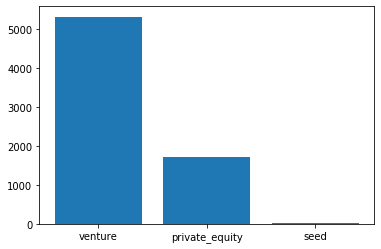

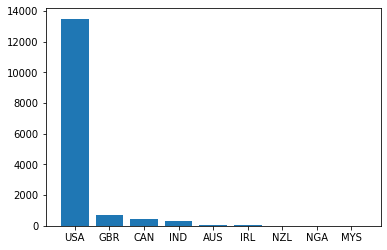

                                   main_sector   tni
5256                                    Others  2923
1783                Cleantech / Semiconductors  2297
11514  Social, Finance, Analytics, Advertising  1912
6298                News, Search and Messaging  1563
3381                                    Health   908
8598                             Manufacturing   799
4806                             Entertainment   580
9493                       Automotive & Sports   167


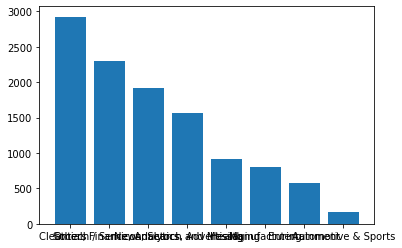

In [12]:
import matplotlib.pyplot as plt

looop=looop.loc[(looop["raised_amount_usd"]>=5000000) & (dfm["raised_amount_usd"]<= 15000000) ,:]#to get the data which has raised amount between 5 to 15 million
k=looop.groupby("funding_round_type")#grouping the data by funding round type
l=k["raised_amount_usd"].sum()/(len(k)*10**6)

l=l[["venture","seed","private_equity"]].sort_values(ascending=False).to_dict()
p=l.keys()
p1=l.values()

plt.bar(p,p1)
plt.show()

k=graph.groupby("country_code")#grouping the data by funding round type

l=k["raised_amount_usd"].sum()//(len(k)*10**6)
l=l.sort_values(ascending=False).to_dict()

p2=l.keys()
p3=l.values()
plt.bar(p2,p3)
plt.show()

f3=d1[["main_sector","tni"]].drop_duplicates()
f3.set_index="main_sector"
f3=f3[["main_sector","tni"]]


p=f3["main_sector"]
p1=f3["tni"] 
plt.bar(p,p1)
plt.show()